# **Project Name**    -  Corona Virus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -** Saurabh Sharma

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Saurabhshrma/Corona-virus-tweet-sentiment-analysis

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

### Dataset Loading

In [84]:
# Load Dataset
df = pd.read_csv('Coronavirus Tweets.csv', encoding='ISO-8859-1')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [41]:
# Dataset Duplicate Value Count

# df.count() give non null values and df.nunique() give unique values in column

for i in df:
    print(i ,' : ',df[i].duplicated().sum())

UserName  :  0
ScreenName  :  0
Location  :  28936
TweetAt  :  41127
OriginalTweet  :  0
Sentiment  :  41152


#### Unique Values

In [21]:
for i in df:
    print(i,':',df[i].nunique())

UserName : 41157
ScreenName : 41157
Location : 12220
TweetAt : 30
OriginalTweet : 41157
Sentiment : 5


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
null_counts = df.isnull().sum()
null_counts

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

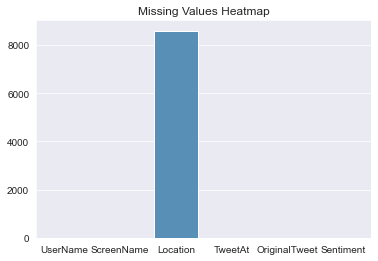

In [20]:
# Visualizing the missing values

sns.set_style('darkgrid')

sns.barplot(x=null_counts.index, y=null_counts.values, palette='Blues_d')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

We are provided with a dataset that contains information about tweets related to coronavirus, including their sentiment and location. The dataset has six columns, including UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment.

Additionally, We know that the dataset has 41157 rows, and the columns UserName and ScreenName contain integer values, whereas the other four columns contain object or string values. 

There are 8590 missing values in the Location column, and there are 5 unique sentiments.


## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [32]:
# Dataset Describe
df.describe()
# not useful in this dataset

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description 

In [34]:
#     UserName: Unique identifier for each user who tweeted
#     ScreenName: Twitter username (handle id) of the user who tweeted
#     Location: Location from where the tweet was sent 
#     TweetAt: Date and time when the tweet was sent
#     OriginalTweet: The actual text of the tweet
#     Sentiment: Sentiment of the tweet (Positive, Negative, Neutral, or Extremely Positive/Negative)

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
col = ['TweetAt','Sentiment']

for i in col:
    print(i,':','counts')
    print(df[i].value_counts())
    print('-------------------------------------------')

TweetAt : counts
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64
-------------------------------------------
Sentiment : counts
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64
-------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.

# Filling the nan values 'unknown'
df['Location'] = df['Location'].fillna('Unknown')

In [85]:
# Converting the tweet to the simple text

def clean_text(text):
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove bit.ly links
    text = re.sub(r'bit.ly/\S+', '', text)
    
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # convert to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    

df['clean_tweet'] = df['OriginalTweet'].apply(lambda x: clean_text(x))

In [92]:
# Removing Stopwords

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['tokens'] = df['clean_tweet'].apply(remove_stopwords)

In [94]:
# One-hot encode the 'Sentiment' column

sentiment_dummies = pd.get_dummies(df['Sentiment'])
df = pd.concat([df, sentiment_dummies], axis=1)

# Drop the original 'Sentiment' column
df.drop('Sentiment', axis=1, inplace=True)

df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,clean_tweet,tokens,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and,,0,0,0,1,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,0,0,0,0,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,0,0,0,0,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...,food stock one empty please panic enough food ...,0,0,0,0,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the outbr...,ready go supermarket outbreak paranoid food st...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...,0,0,0,1,0
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,response to complaint not provided citing covi...,response complaint provided citing covid 19 re...,1,0,0,0,0
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,you know itâ s getting tough when is rationing...,know itâ getting tough rationing toilet paper ...,0,0,0,0,1
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,is it wrong that the smell of hand sanitizer i...,wrong smell hand sanitizer starting turn,0,0,0,1,0


In [95]:
# Transforming TweetAt to datetime column

df['TweetAt'] = pd.to_datetime(df['TweetAt'])


In [97]:
# Range for which tweets are available

print('Starting Date :', min(df['TweetAt'])) 
print('Last Date :', max(df['TweetAt'])) 

Starting Date : 2020-01-04 00:00:00
Last Date : 2020-12-04 00:00:00


### What all manipulations have you done and insights you found?

- Changed the NaN values in Location to 'Unknown'.
- Cleaned and preprocessed the 'OriginalTweet' column by removing URLs, hashtags, mentions, and special characters, and    converting everything to lowercase.
- Transformed the 'Sentiment' column into numerical values using  one-hot encoding techniques.
- Converted the 'TweetAt' column to a datetime column.

 During our exploratory data analysis, we found that:

- The 'Location' column had 8,590 missing values, which means around 20% of the data in this column was missing.
- The 'Sentiment' column had fie categories - positive, negative,extremely positive,extremely negative, and neutral.
- The majority of the tweets were in the Positive sentiment category, followed by Negative and Neutral sentiments.
- The 'TweetAt' column had only 30 duplicated values, but it ranges from January 2020 till December 2020.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***